In [2]:
import numpy as np
import math 
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import animation
import random
import pylab

In [3]:
#first we plot the correlations
#finding the correlations:

In [4]:
#finding the correlations

def correlation(sample):
    avg = np.average(sample)
    n_array = sample.size-np.arange(sample.size)
    tmp = np.correlate(sample,sample,mode='full')
    result = tmp[tmp.size//2:]*1./n_array-avg**2
    vec = result/result[0]
    return(vec)

def IACT(sample,window):
    vec = correlation(sample)
    iact = 1+2*sum(vec[1:window])
    return(iact)


In [5]:
#we first find all the values at beta_c

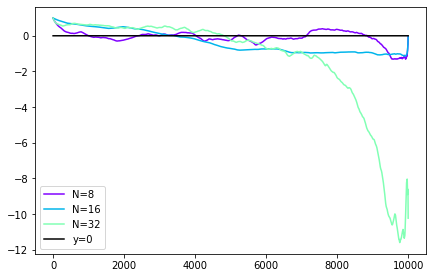

In [6]:
n=10000

samples_8 = np.load("samples_beta_c_8.npy")
samples_16 = np.load("samples_beta_c_16.npy")
samples_32 = np.load("samples_beta_c_32.npy")
#samples_64 = np.load("samples_beta_c_64.npy")
#samples_128 = np.load("samples_beta_c_128.npy")

corr_8 = correlation(samples_8)
corr_16 = correlation(samples_16)
corr_32 = correlation(samples_32)
#corr_64 = correlation(samples_64)
#corr_128 = correlation(samples_128)

fig = plt.figure(figsize=(7, 10))
ax = fig.add_subplot(2, 1, 1)

number_of_colors = 5
color = plt.cm.rainbow(np.linspace(0, 1, number_of_colors))

line_8, = ax.plot(corr_8[:n],color=color[0],label='N=8')
line_16, = ax.plot(corr_16[:n] ,color=color[1],label='N=16')
line_32, = ax.plot(corr_32[:n] ,color=color[2],label='N=32')
line, = ax.plot(np.zeros(n) ,color='black',label='y=0')
#line_64, = ax.plot(corr_64[:2000] ,color=color[3],label='N=64')
#line_128, = ax.plot(corr_128[:2000] ,color=color[4],label='N=128')

#ax.set_yscale('log')
ax.legend()

pylab.show()

#images to save are at n=1000 n=5000 and n=10000

In [7]:
#find suggested windows

#based on the plot above we suggest windows of 

window_8 = 1000
window_16 = 3500
window_32 = 5000

#Give the IACT at the suggested windows

IACT_8 = IACT(samples_8,window_8)
IACT_16 = IACT(samples_16,window_16)
IACT_32 = IACT(samples_32,window_32)

In [8]:
print('N=8: ', IACT_8)
print('N=16: ', IACT_16)
print('N=32: ', IACT_32)

N=8:  569.3416317316627
N=16:  3065.6969653299225
N=32:  4395.873245655578
